## EDA Of Electricity Data

In [33]:
## Import Basic Library
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import mean_squared_error,r2_score


import plotly.express as px
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV,ElasticNet,ElasticNetCV,LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn import neighbors
from sklearn.svm import SVR
import warnings
warnings.filterwarnings("ignore")

## Read the Data

In [34]:
data=pd.read_csv(r"D:\Project _Electricity Price prediction\electricity.csv")

In [35]:
data.head(5)           ## Top five coloumns of data

,DateTime,Holiday,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,PeriodOfDay,ForecastWindProduction,SystemLoadEA,SMPEA,ORKTemperature,ORKWindspeed,CO2Intensity,ActualWindProduction,SystemLoadEP2,SMPEP2
0,01-11-2011 00:00,None,0,1,44,1,11,2011,0,315.31,3388.77,49.26,6,9.3,600.71,356,3159.6,54.32
1,01-11-2011 00:30,None,0,1,44,1,11,2011,1,321.8,3196.66,49.26,6,11.1,605.42,317,2973.01,54.23
2,01-11-2011 01:00,None,0,1,44,1,11,2011,2,328.57,3060.71,49.1,5,11.1,589.97,311,2834,54.23
3,01-11-2011 01:30,None,0,1,44,1,11,2011,3,335.6,2945.56,48.04,6,9.3,585.94,313,2725.99,53.47
4,01-11-2011 02:00,None,0,1,44,1,11,2011,4,342.9,2849.34,33.75,6,11.1,571.52,346,2655.64,39.87


In [36]:
data.tail(5)          ## Last five coloumns of data

,DateTime,Holiday,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,PeriodOfDay,ForecastWindProduction,SystemLoadEA,SMPEA,ORKTemperature,ORKWindspeed,CO2Intensity,ActualWindProduction,SystemLoadEP2,SMPEP2
38009,31-12-2013 21:30,New Year's Eve,1,1,1,31,12,2013,43,1179.14,3932.22,34.51,6,22.2,285.31,812,3692.95,42.45
38010,31-12-2013 22:00,New Year's Eve,1,1,1,31,12,2013,44,1152.01,3821.44,33.83,5,24.1,278.31,852,3571.0,33.83
38011,31-12-2013 22:30,New Year's Eve,1,1,1,31,12,2013,45,1123.67,3724.21,31.75,4,20.4,280.91,962,3460.29,31.75
38012,31-12-2013 23:00,New Year's Eve,1,1,1,31,12,2013,46,1094.24,3638.16,33.83,5,14.8,302.46,950,3563.99,50.6
38013,31-12-2013 23:30,New Year's Eve,1,1,1,31,12,2013,47,1064.0,3624.25,33.83,5,16.7,308.01,1020,3517.08,34.9


In [37]:
data.shape


(38014, 18)

In [38]:
data.info()          ## Information Of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38014 entries, 0 to 38013
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   DateTime                38014 non-null  object
 1   Holiday                 38014 non-null  object
 2   HolidayFlag             38014 non-null  int64 
 3   DayOfWeek               38014 non-null  int64 
 4   WeekOfYear              38014 non-null  int64 
 5   Day                     38014 non-null  int64 
 6   Month                   38014 non-null  int64 
 7   Year                    38014 non-null  int64 
 8   PeriodOfDay             38014 non-null  int64 
 9   ForecastWindProduction  38014 non-null  object
 10  SystemLoadEA            38014 non-null  object
 11  SMPEA                   38014 non-null  object
 12  ORKTemperature          38014 non-null  object
 13  ORKWindspeed            38014 non-null  object
 14  CO2Intensity            38014 non-null  object
 15  Ac

In [39]:
data.describe()        ## describe of the data

,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,PeriodOfDay
count,38014.000000,38014.000000,38014.000000,38014.000000,38014.000000,38014.000000,38014.000000
mean,0.040406,2.997317,28.124586,15.739412,6.904246,2012.383859,23.501105
std,0.196912,1.999959,15.587575,8.804247,3.573696,0.624956,13.853108
min,0.000000,0.000000,1.000000,1.000000,1.000000,2011.000000,0.000000
25%,0.000000,1.000000,15.000000,8.000000,4.000000,2012.000000,12.000000
50%,0.000000,3.000000,29.000000,16.000000,7.000000,2012.000000,24.000000
75%,0.000000,5.000000,43.000000,23.000000,10.000000,2013.000000,35.750000
max,1.000000,6.000000,52.000000,31.000000,12.000000,2013.000000,47.000000


In [40]:
data.columns     ## Cloumns List

Index(['DateTime', 'Holiday', 'HolidayFlag', 'DayOfWeek', 'WeekOfYear', 'Day',
       'Month', 'Year', 'PeriodOfDay', 'ForecastWindProduction',
       'SystemLoadEA', 'SMPEA', 'ORKTemperature', 'ORKWindspeed',
       'CO2Intensity', 'ActualWindProduction', 'SystemLoadEP2', 'SMPEP2'],
      dtype='object')

In [41]:
data.nunique()   ## nunique Values of Data

DateTime                  38014
Holiday                      15
HolidayFlag                   2
DayOfWeek                     7
WeekOfYear                   52
Day                          31
Month                        12
Year                          3
PeriodOfDay                  48
ForecastWindProduction    29312
SystemLoadEA              36166
SMPEA                      8661
ORKTemperature               31
ORKWindspeed                 53
CO2Intensity              25115
ActualWindProduction       2940
SystemLoadEP2             36171
SMPEP2                     9277
dtype: int64

In [42]:
data.isnull().sum()          # This function used by see the isnull values

DateTime                  0
Holiday                   0
HolidayFlag               0
DayOfWeek                 0
WeekOfYear                0
Day                       0
Month                     0
Year                      0
PeriodOfDay               0
ForecastWindProduction    0
SystemLoadEA              0
SMPEA                     0
ORKTemperature            0
ORKWindspeed              0
CO2Intensity              0
ActualWindProduction      0
SystemLoadEP2             0
SMPEP2                    0
dtype: int64

### Find duplicate rows and remove

In [43]:
duplicate_rows_data = data[data.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)

number of duplicate rows:  (0, 18)


In [12]:
# we are findig 0 duplicate

In [44]:
## Remove categorical features
data_cont = data.copy()

for i in data_cont.columns:
    if data_cont[i].dtype == "object":
        data_cont.drop(i, axis=1, inplace=True)
data_cont.head(5)

,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,PeriodOfDay
0,0,1,44,1,11,2011,0
1,0,1,44,1,11,2011,1
2,0,1,44,1,11,2011,2
3,0,1,44,1,11,2011,3
4,0,1,44,1,11,2011,4


In [45]:
# we have accessed the class counts for each category
#Let's convert string values to floats;
# convert 
data["ForecastWindProduction"]=pd.to_numeric(data["ForecastWindProduction"], errors= 'coerce')
data["SystemLoadEA"] = pd.to_numeric(data["SystemLoadEA"], errors= 'coerce')
data["SMPEA"] = pd.to_numeric(data["SMPEA"], errors= 'coerce')
data["ORKTemperature"] = pd.to_numeric(data["ORKTemperature"], errors= 'coerce')
data["ORKWindspeed"] = pd.to_numeric(data["ORKWindspeed"], errors= 'coerce')
data["CO2Intensity"] = pd.to_numeric(data["CO2Intensity"], errors= 'coerce')
data["ActualWindProduction"] = pd.to_numeric(data["ActualWindProduction"], errors= 'coerce')
data["SystemLoadEP2"] = pd.to_numeric(data["SystemLoadEP2"], errors= 'coerce')
data["SMPEP2"] = pd.to_numeric(data["SMPEP2"], errors= 'coerce')

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38014 entries, 0 to 38013
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DateTime                38014 non-null  object 
 1   Holiday                 38014 non-null  object 
 2   HolidayFlag             38014 non-null  int64  
 3   DayOfWeek               38014 non-null  int64  
 4   WeekOfYear              38014 non-null  int64  
 5   Day                     38014 non-null  int64  
 6   Month                   38014 non-null  int64  
 7   Year                    38014 non-null  int64  
 8   PeriodOfDay             38014 non-null  int64  
 9   ForecastWindProduction  38009 non-null  float64
 10  SystemLoadEA            38012 non-null  float64
 11  SMPEA                   38012 non-null  float64
 12  ORKTemperature          37719 non-null  float64
 13  ORKWindspeed            37715 non-null  float64
 14  CO2Intensity            38007 non-null

## Data preprocessing

In [16]:
# missing value query
data.isna().sum()

DateTime                    0
Holiday                     0
HolidayFlag                 0
DayOfWeek                   0
WeekOfYear                  0
Day                         0
Month                       0
Year                        0
PeriodOfDay                 0
ForecastWindProduction      5
SystemLoadEA                2
SMPEA                       2
ORKTemperature            295
ORKWindspeed              299
CO2Intensity                7
ActualWindProduction        5
SystemLoadEP2               2
SMPEP2                      2
dtype: int64

### we can see that there are missing values in our dataset, for this, let's look at the distribution situations before removing the missing values, then we can develop a strategy for missing values



In [46]:
data.dropna(inplace=True)  # Remove the isnull values

In [47]:
data.drop(['DateTime',], axis=1, inplace=True)               # drop the unwanted coloumn

In [48]:
data.head(3)

,Holiday,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,PeriodOfDay,ForecastWindProduction,SystemLoadEA,SMPEA,ORKTemperature,ORKWindspeed,CO2Intensity,ActualWindProduction,SystemLoadEP2,SMPEP2
0,None,0,1,44,1,11,2011,0,315.31,3388.77,49.26,6.0,9.3,600.71,356.0,3159.60,54.32
1,None,0,1,44,1,11,2011,1,321.80,3196.66,49.26,6.0,11.1,605.42,317.0,2973.01,54.23
2,None,0,1,44,1,11,2011,2,328.57,3060.71,49.10,5.0,11.1,589.97,311.0,2834.00,54.23


In [58]:
cat_list=[]
num_list=[]

for i in data.columns:
    unique_val=len(data[i].unique())
    
    if unique_val<40:
        cat_list.append(i)
    else:
        num_list.append(i)

In [59]:
cat_list.append("WeekOfYear")

In [60]:
num_list

['WeekOfYear',
 'PeriodOfDay',
 'ForecastWindProduction',
 'SystemLoadEA',
 'SMPEA',
 'ORKWindspeed',
 'CO2Intensity',
 'ActualWindProduction',
 'SystemLoadEP2',
 'SMPEP2']

In [61]:
num_list.remove("WeekOfYear")
num_list

['PeriodOfDay',
 'ForecastWindProduction',
 'SystemLoadEA',
 'SMPEA',
 'ORKWindspeed',
 'CO2Intensity',
 'ActualWindProduction',
 'SystemLoadEP2',
 'SMPEP2']

In [57]:
num_list.append("ORKTemperature")

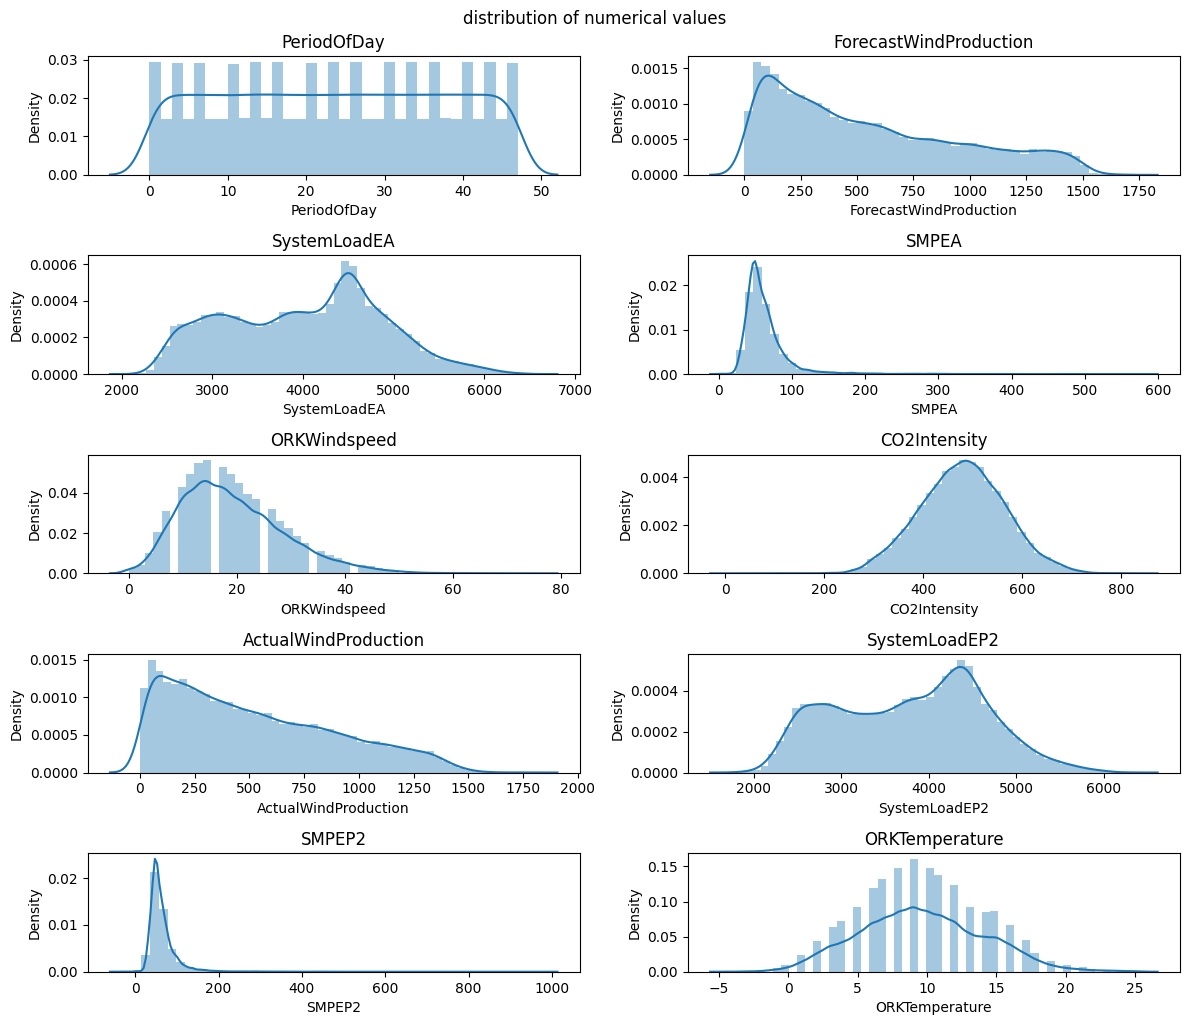

In [25]:
k=1
plt.figure(figsize=(12,12))
plt.suptitle("distribution of numerical values")


for i in data.loc[:,num_list]:
    plt.subplot(6,2,k)     
    sns.distplot(data[i])
    plt.title(i)
    k+=1
    plt.tight_layout()

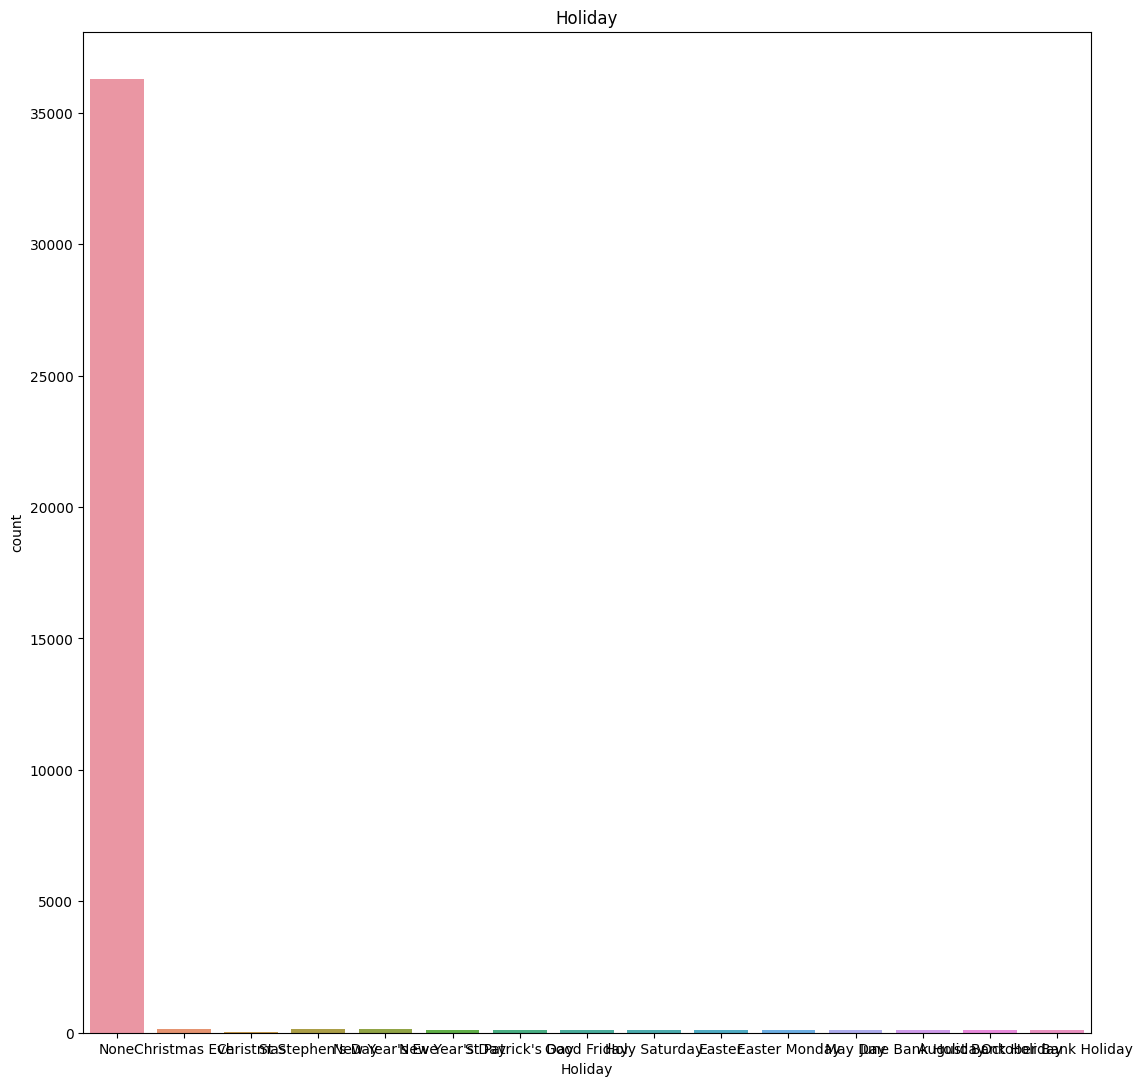

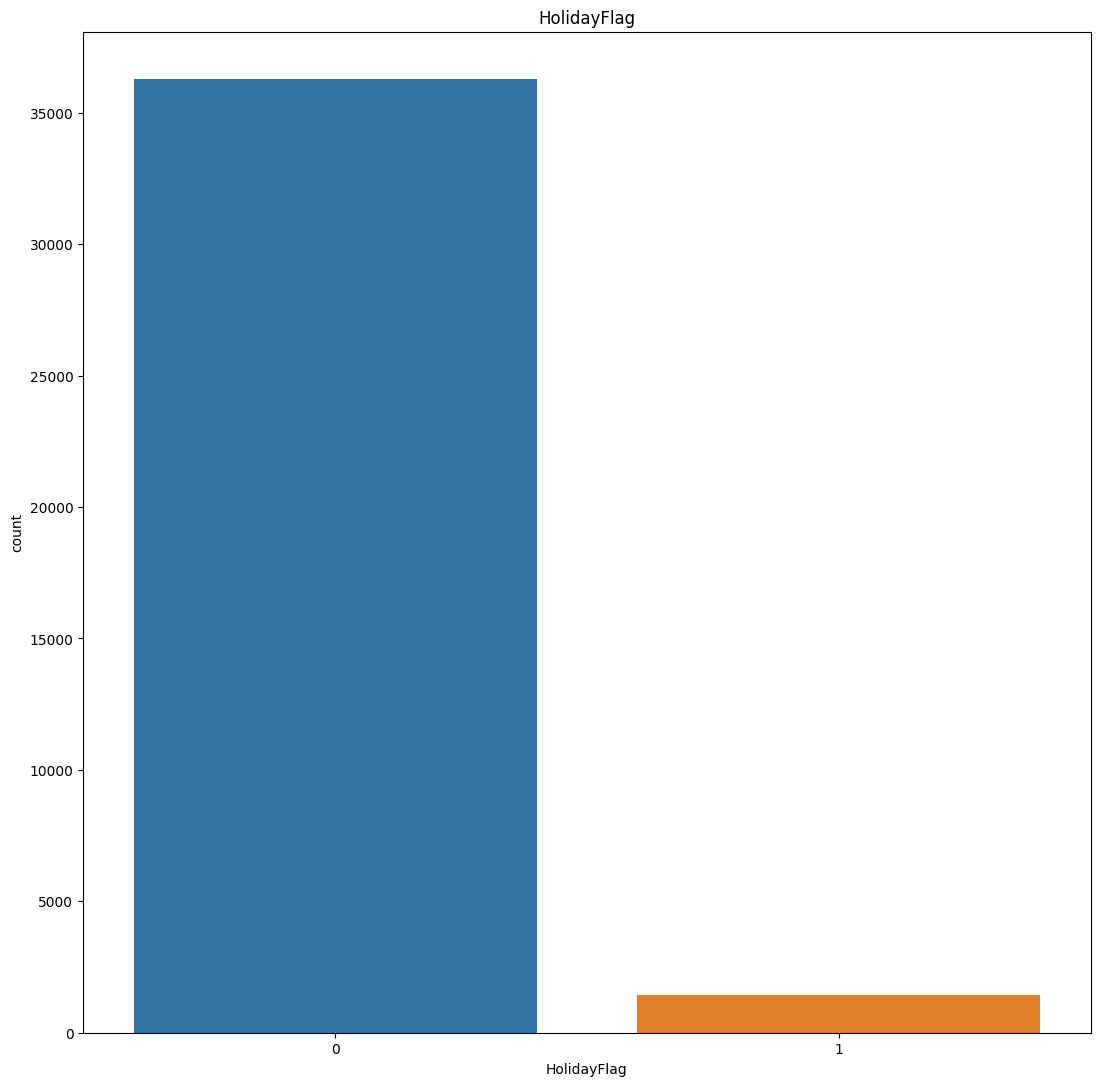

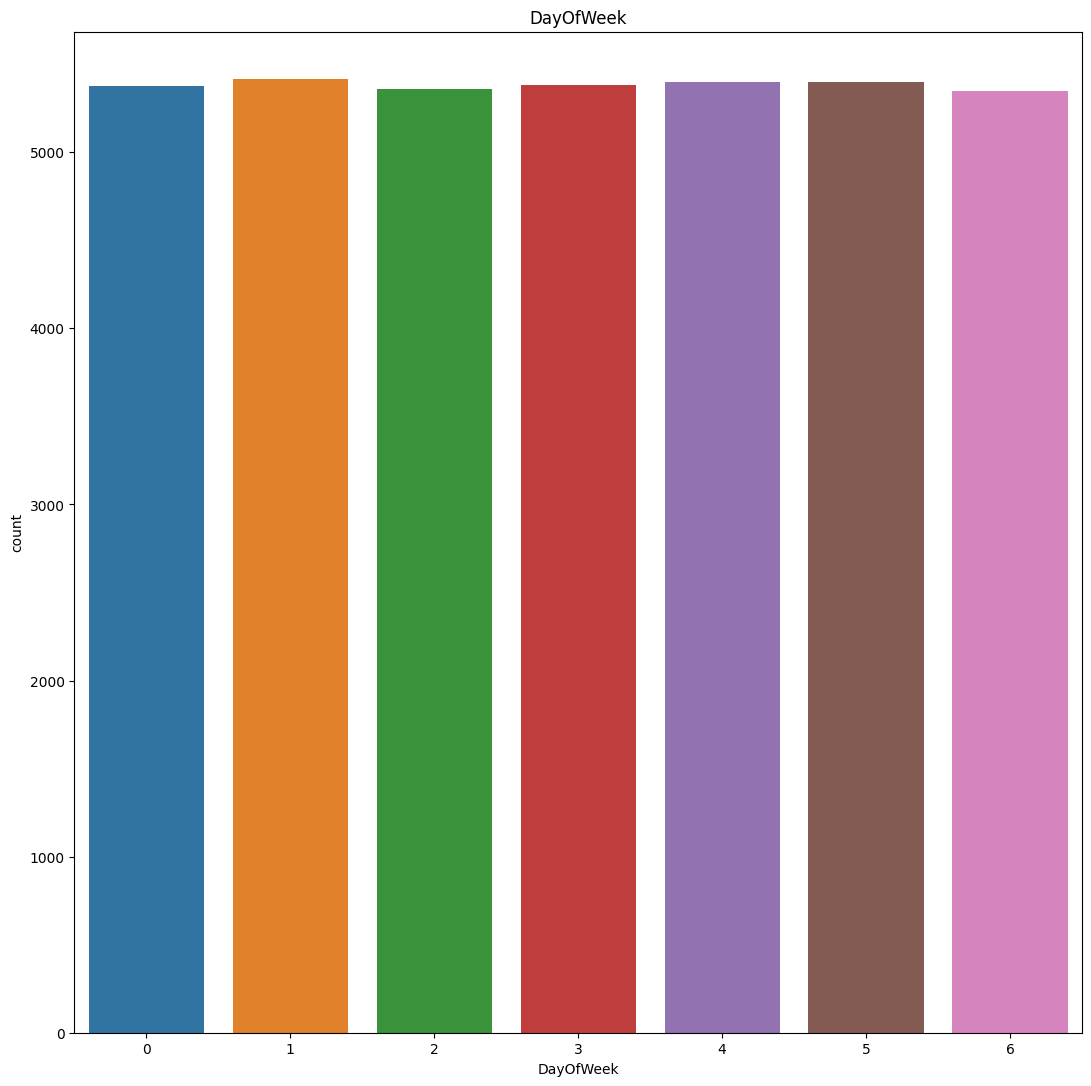

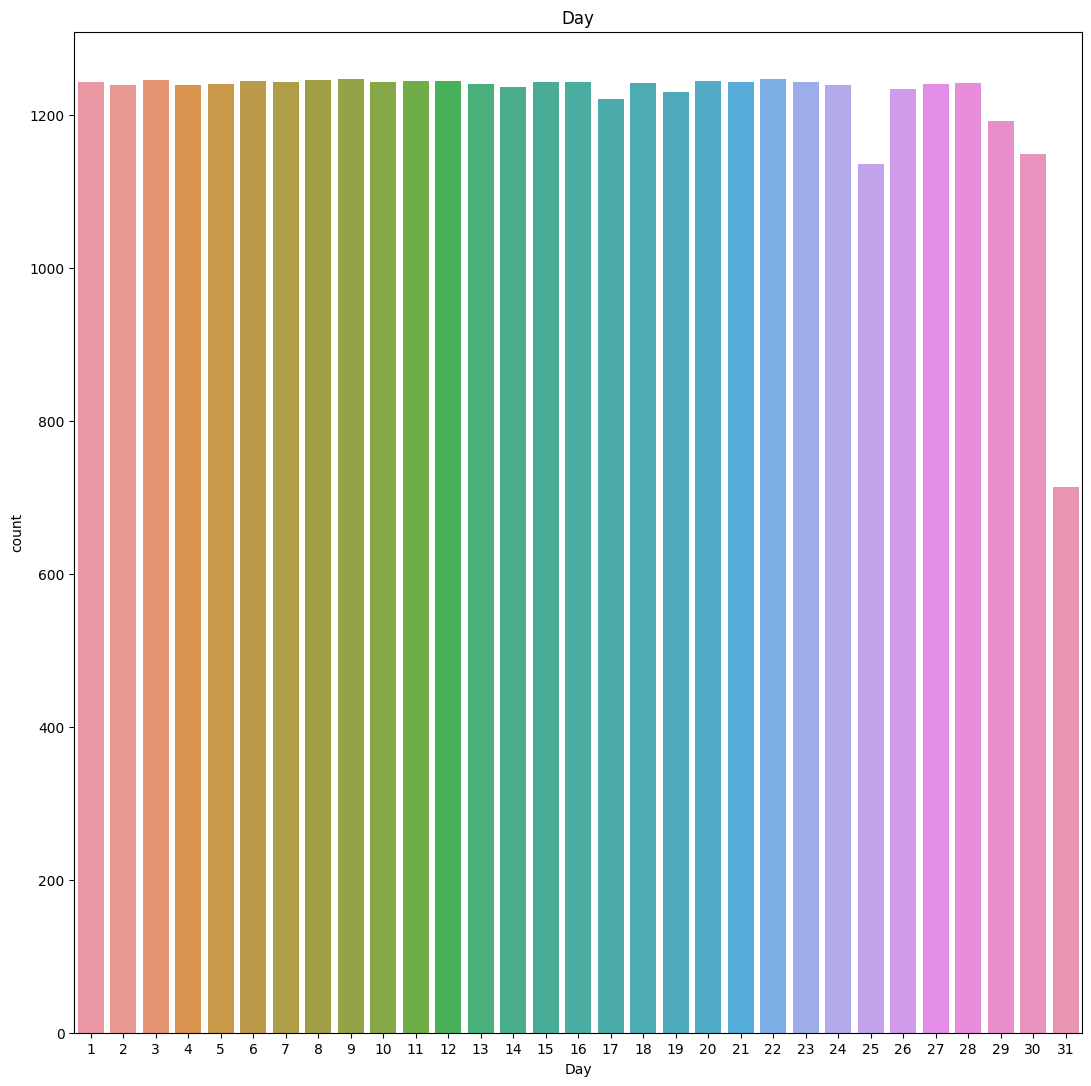

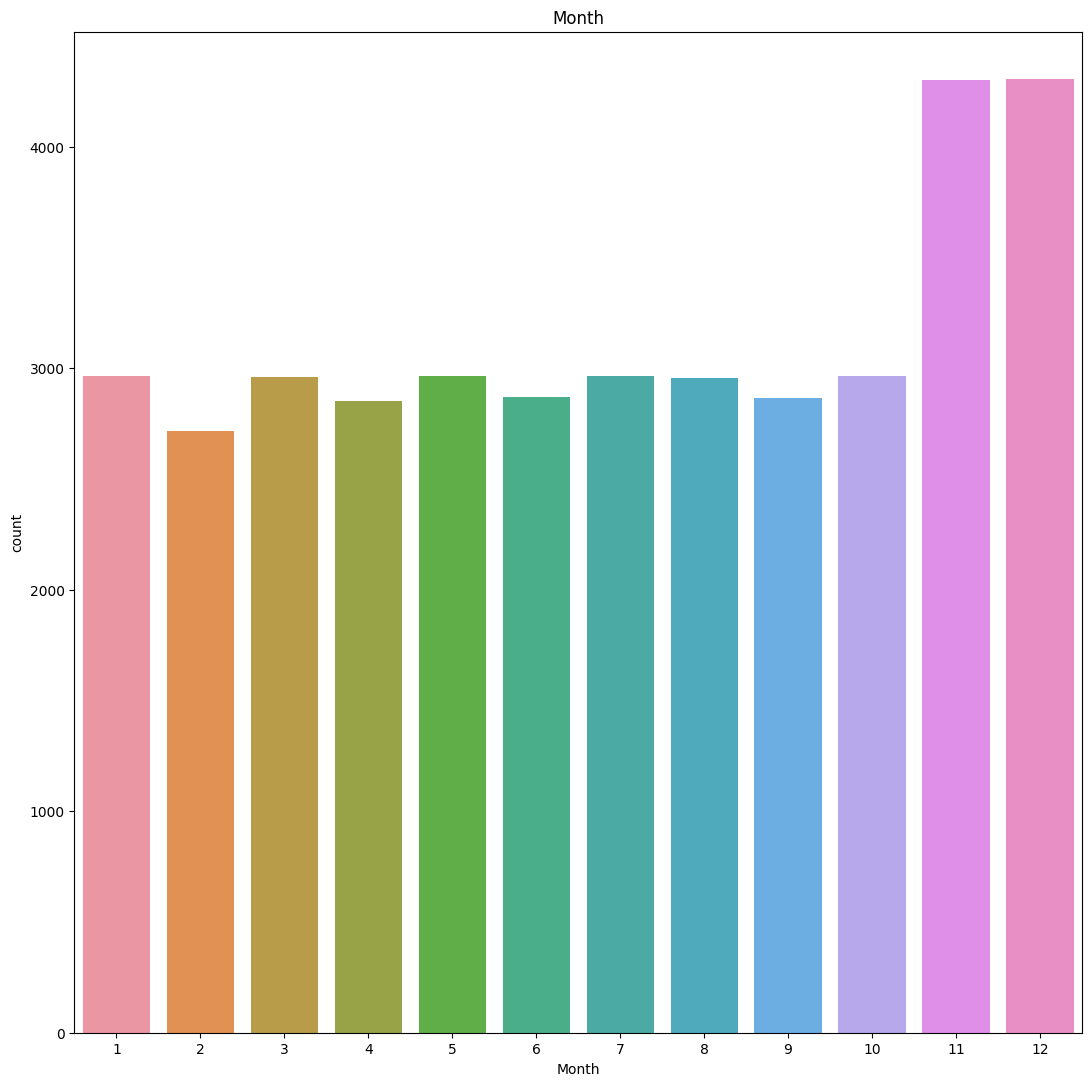

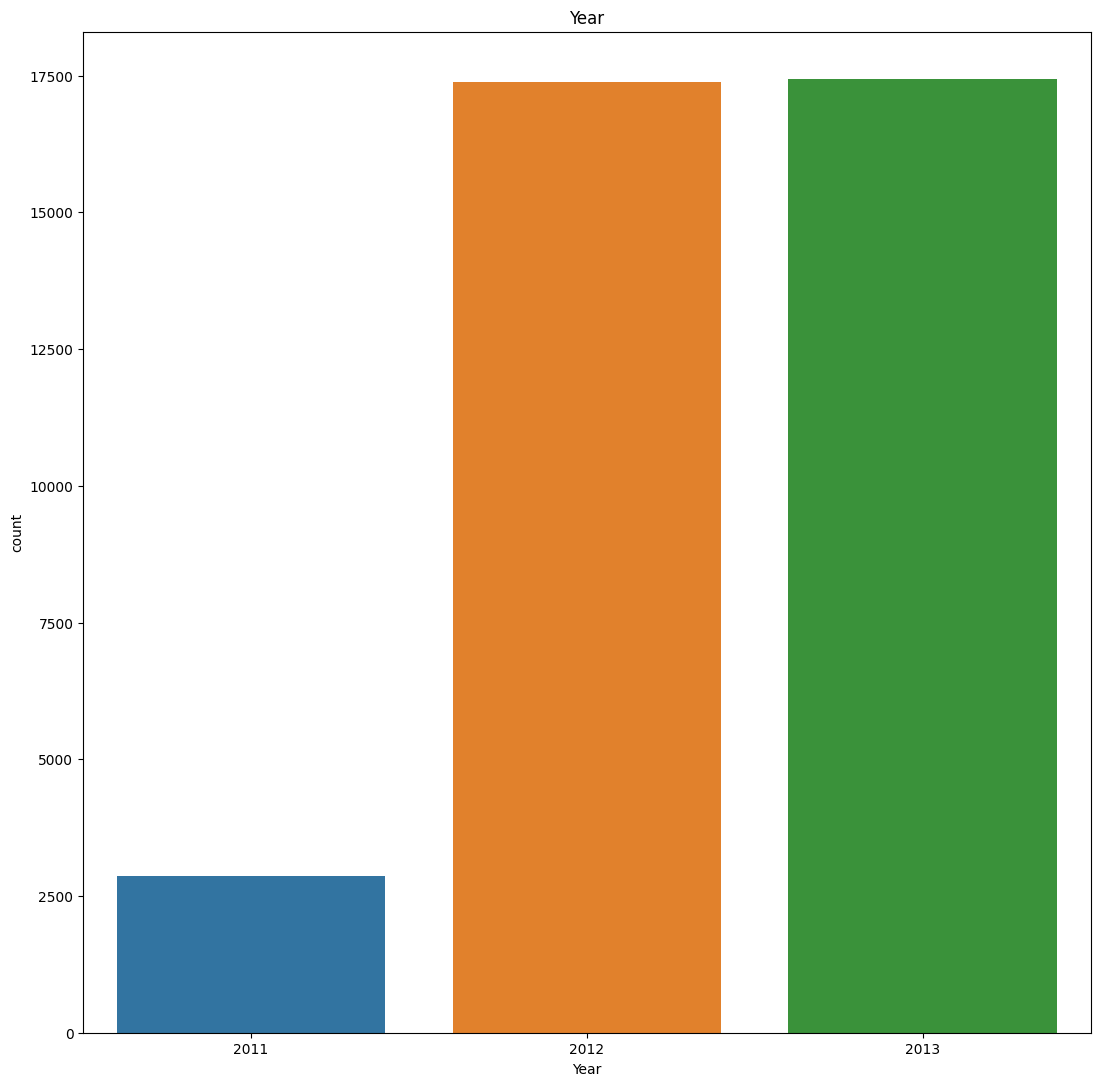

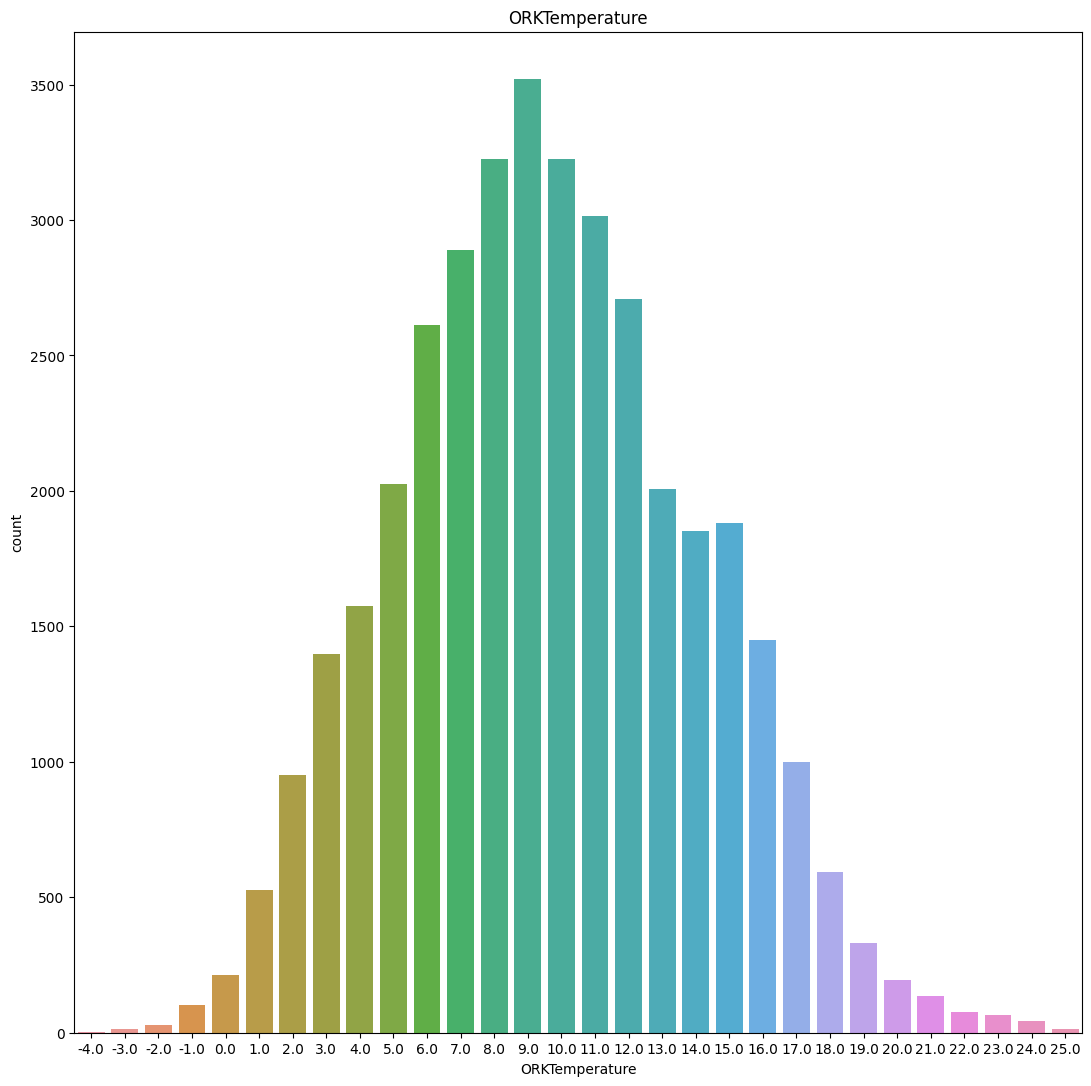

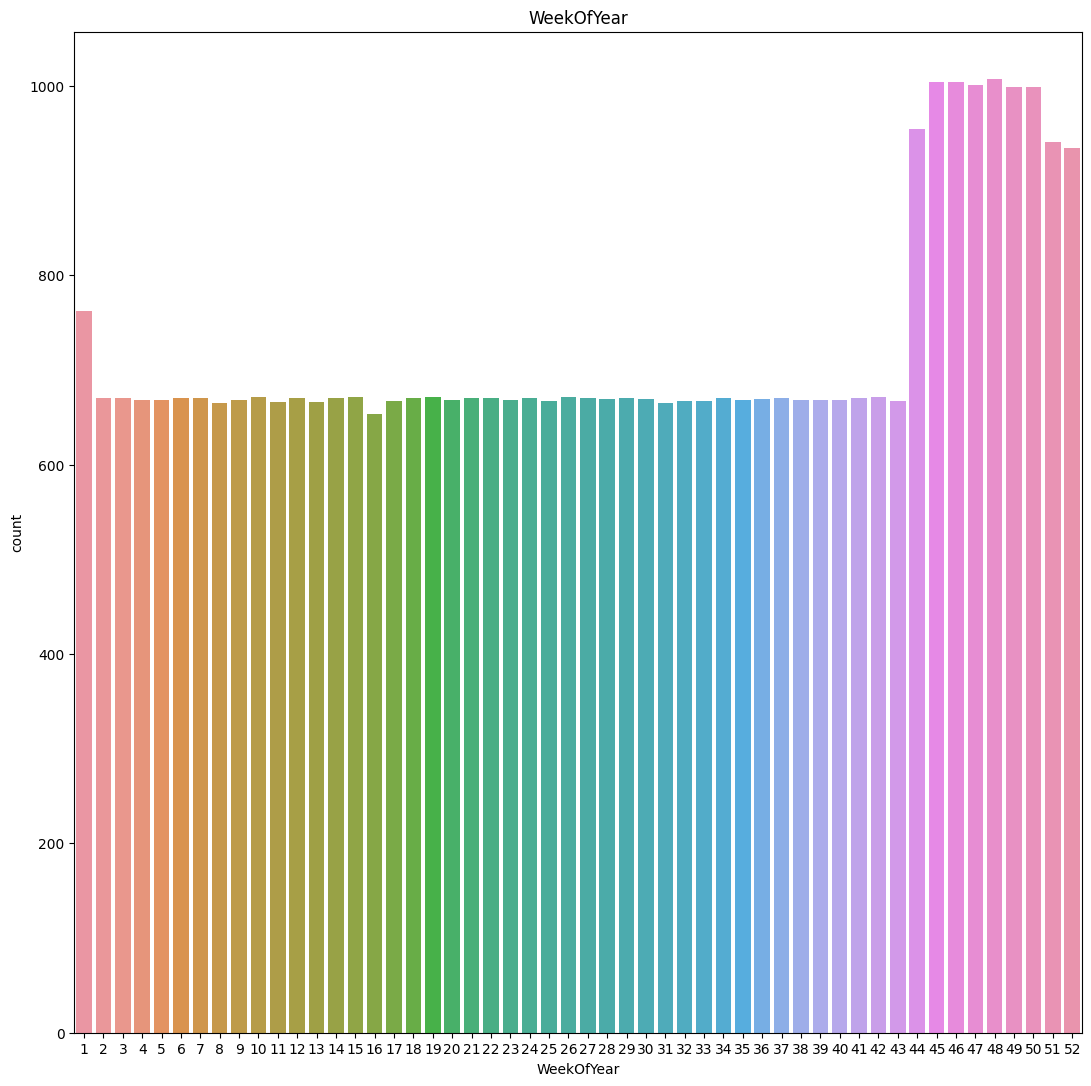

In [62]:
# Categoricakl Analysis

for i in cat_list:
    
    plt.figure(figsize=(13,13))
    sns.countplot(x=i,data=data.loc[:,cat_list])
    plt.title(i)

## Label Encoding


In [63]:
from sklearn.preprocessing import LabelEncoder

# Assuming you have a categorical column 'color' in a DataFrame 'data'
label_encoder = LabelEncoder()
data['Holiday'] = label_encoder.fit_transform(data['Holiday'])


In [64]:
data.head(3) # after label encoding

,Holiday,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,PeriodOfDay,ForecastWindProduction,SystemLoadEA,SMPEA,ORKTemperature,ORKWindspeed,CO2Intensity,ActualWindProduction,SystemLoadEP2,SMPEP2
0,11,0,1,44,1,11,2011,0,315.31,3388.77,49.26,6.0,9.3,600.71,356.0,3159.60,54.32
1,11,0,1,44,1,11,2011,1,321.80,3196.66,49.26,6.0,11.1,605.42,317.0,2973.01,54.23
2,11,0,1,44,1,11,2011,2,328.57,3060.71,49.10,5.0,11.1,589.97,311.0,2834.00,54.23


## split train data and test data

In [65]:
# target and lable
X = data.drop(columns=['SMPEP2'])  # excluding target 'SMPEP2'.
y = data['SMPEP2']                 # includingTarget 'SMPEP2'.
X_train,X_test,y_train,y_test= train_test_split(X,y, train_size=0.7, shuffle=True , random_state=123)

In [66]:
X_train.dtypes

Holiday                     int32
HolidayFlag                 int64
DayOfWeek                   int64
WeekOfYear                  int64
Day                         int64
Month                       int64
Year                        int64
PeriodOfDay                 int64
ForecastWindProduction    float64
SystemLoadEA              float64
SMPEA                     float64
ORKTemperature            float64
ORKWindspeed              float64
CO2Intensity              float64
ActualWindProduction      float64
SystemLoadEP2             float64
dtype: object

### X and y variables are split into X_train, X_test, y_train, and y_test with a train size of 0.7 (70% of the data) and a random state of 123 for reproducibility. The shuffle parameter is set to True to shuffle the data before splitting.

In [67]:
X_train.to_csv('files/train/raw/X_train.csv',index=False)
y_train.to_csv('files/train/raw/y_train.csv',index=False)

X_test.to_csv('files/test/raw/x_test.csv',index=False)
y_test.to_csv('files/test/raw/y_test.csv',index=False)

## Heat map correlation

<AxesSubplot: >

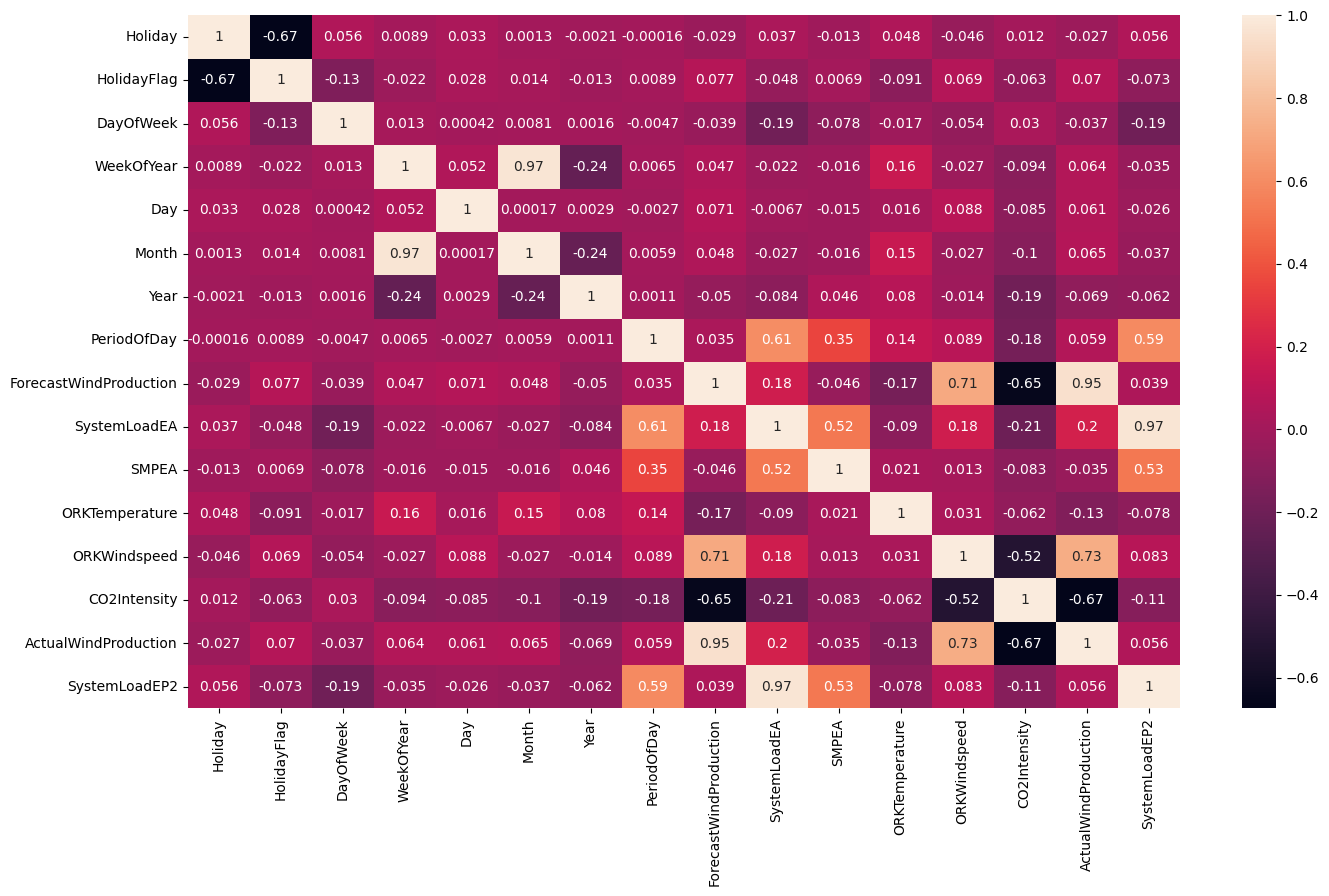

In [32]:
plt.figure(figsize=(16,9))
sns.heatmap(X_train.corr(),annot=True)